In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data Wrangling

In [2]:
# Read dataframe to df
df = pd.read_csv('MIRFreshMeats.csv')

In [3]:
# Label chicken sample as 1, pork sample as 2 and turkey sample as 3
col = []
for i in df.columns:
    if i.startswith('FreshChicken'):
        col.append(1)
    elif i.startswith('FreshPork'):
        col.append(2)
    elif i.startswith('FreshTurkey'):
        col.append(3)

In [4]:
df_new = df.copy()

df_new = df_new.set_index('Wavenumbers').T

df_new.head()

Wavenumbers,1005.3495,1007.279,1009.2085,1011.138,1013.0675,1014.997,1016.9265,1018.856,1020.7855,1022.715,...,1850.4985,1852.428,1854.3575,1856.287,1858.2165,1860.146,1862.0755,1864.005,1865.9345,1867.864
FreshChicken_SupplierA_Sample1_RunA,0.549877,0.547642,0.546241,0.545228,0.544197,0.543473,0.543225,0.543198,0.543204,0.543680,...,0.123377,0.123171,0.122781,0.122531,0.122145,0.121486,0.121022,0.120622,0.120422,0.120080
FreshChicken_SupplierA_Sample1_RunB,0.566602,0.564157,0.561647,0.559985,0.559094,0.558805,0.558537,0.558086,0.558625,0.559732,...,0.125434,0.125259,0.124734,0.124083,0.123715,0.123286,0.122950,0.122439,0.121957,0.121865
FreshChicken_SupplierA_Sample2_RunA,0.553335,0.551368,0.550186,0.549358,0.548730,0.547627,0.546762,0.546446,0.546770,0.547569,...,0.124214,0.123966,0.123540,0.123035,0.122428,0.122045,0.121934,0.121284,0.120695,0.120630
FreshChicken_SupplierA_Sample2_RunB,0.548296,0.545831,0.544296,0.543322,0.542496,0.541857,0.541653,0.541519,0.541658,0.542475,...,0.122528,0.122166,0.121617,0.121203,0.120822,0.120442,0.120070,0.119389,0.119158,0.119036
FreshChicken_SupplierA_Sample3_RunA,0.551651,0.549111,0.547683,0.546638,0.545760,0.544837,0.544567,0.544762,0.544968,0.545869,...,0.123864,0.123673,0.123568,0.123339,0.122980,0.122544,0.122142,0.121610,0.121119,0.120911


Create data and labels

In [5]:
xdata = df_new.values
ydata = np.array(col)

Split chicken, pork and turkey datasets

In [6]:
xdata_chicken = xdata[ydata == 1]
xdata_pork = xdata[ydata == 2]
xdata_turkey = xdata[ydata == 3]

In [7]:
# Average the chicken, pork and turkey samples respectively
xdata_chicken_mean = np.mean(xdata_chicken, axis=0)
xdata_pork_mean = np.mean(xdata_pork, axis=0)
xdata_turkey_mean = np.mean(xdata_turkey, axis=0)

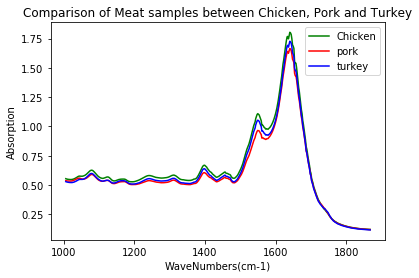

In [8]:
_ = plt.plot(df_new.columns, xdata_chicken_mean,color = 'green', label = 'Chicken')
_ = plt.plot(df_new.columns, xdata_pork_mean,color = 'red', label = 'pork')
_ = plt.plot(df_new.columns, xdata_turkey_mean,color = 'blue', label = 'turkey')
plt.legend(loc='best')
plt.xlabel('WaveNumbers(cm-1)')
plt.ylabel('Absorption')
plt.title('Comparison of Meat samples between Chicken, Pork and Turkey')

Interactive plot using plotly

In [9]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools
py.init_notebook_mode(connected=True)

In [10]:
data1 = go.Scatter(x = df_new.columns, y = xdata_chicken_mean, line = dict(color = 'green'), name = 'Fresh Chicken')
data2 = go.Scatter(x = df_new.columns, y = xdata_pork_mean, line = dict(color = 'red'), name = 'Fresh Pork')
data3 = go.Scatter(x = df_new.columns, y = xdata_turkey_mean, line = dict(color = 'blue'), name = 'Fresh Turkey')
layout = go.Layout(title = 'Comparison of Meat samples between Chicken, Pork and Turkey',
                  xaxis = dict(title = 'WaveNumbers(cm-1)'),
                  yaxis = dict(title = 'Absorption'))
fig = dict(data = [data1, data2, data3], layout = layout)
py.iplot(fig)

## 2. PCA Visualization

In [11]:
from sklearn.decomposition import PCA

pca = PCA()

xdata_transform = pca.fit_transform(xdata)

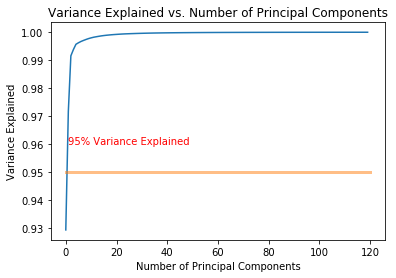

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.title('Variance Explained vs. Number of Principal Components')
plt.plot([0,120],[0.95,0.95],linewidth = 3, alpha =0.5)
plt.annotate('95% Variance Explained', xy=(1,0.96), xytext=(1,0.96), color = 'r')

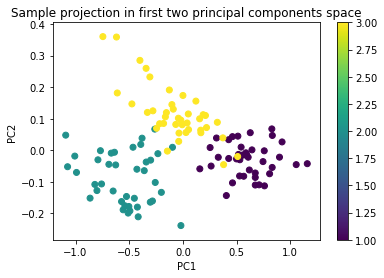

In [13]:
plt.scatter(xdata_transform[:,0],xdata_transform[:,1], c = ydata)
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Sample projection in first two principal components space')

In [14]:
np.sum(pca.explained_variance_ratio_[:1])

0.92927550981097562

## 3. Model Selection and Comparison

#### 1. SVM

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score

In [16]:
def report(model, y, predict):
    print('Report of ' + model)
    print('=================================================================================')
    print('Accuracy of the model:{}'.format(accuracy_score(y, predict)))
    print('Confusion Matrix:')
    print(confusion_matrix(y, predict))

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(xdata_transform[:,:10],ydata, test_size = 0.3, random_state = 3)

In [18]:
pipeline = make_pipeline(StandardScaler(),SVC())
param_grid = {'svc__C':10.0**np.arange(-3,3), 'svc__gamma': 10.0**np.arange(-3,3)}
gs_svc = GridSearchCV(pipeline, param_grid=param_grid)
gs_svc.fit(xtrain, ytrain)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'svc__C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02]), 'svc__gamma': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [19]:
gs_svc.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [20]:
svc_predict = gs_svc.predict(xtest)

In [21]:
report('svc', ytest, svc_predict)

Report of svc
Accuracy of the model:1.0
Confusion Matrix:
[[11  0  0]
 [ 0  9  0]
 [ 0  0 16]]


#### 2. LDA

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [23]:
lda = LinearDiscriminantAnalysis()
lda.fit(xtrain, ytrain)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [24]:
lda_predict = lda.predict(xtest)

In [25]:
report('LDA', ytest, lda_predict)

Report of LDA
Accuracy of the model:1.0
Confusion Matrix:
[[11  0  0]
 [ 0  9  0]
 [ 0  0 16]]


## 4. Selection of Important Features

#### Random Forest to select important features

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xdata,ydata)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

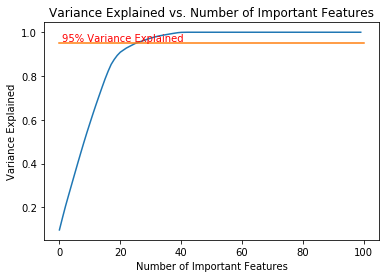

In [27]:
plt.plot(np.cumsum(np.sort(rf.feature_importances_)[::-1][:100]))
plt.plot([0,100],[0.95,0.95])
plt.annotate('95% Variance Explained', xy=(1,0.96), xytext=(1,0.96), color = 'r')
plt.xlabel('Number of Important Features')
plt.ylabel('Variance Explained')
plt.title('Variance Explained vs. Number of Important Features')

#### Extract the top 10 important features

In [28]:
df_new.columns[np.argsort(rf.feature_importances_)[::-1][:10]]

Float64Index([1599.6545,  1601.584, 1657.5415,  1690.345,  1562.993, 1545.6265,
               1597.725,  1404.769,  1543.697, 1591.9365],
             dtype='float64', name='Wavenumbers')

(array([ 1.,  0.,  0.,  0.,  2.,  1.,  4.,  0.,  1.,  1.]),
 array([ 1404.769 ,  1433.3266,  1461.8842,  1490.4418,  1518.9994,
         1547.557 ,  1576.1146,  1604.6722,  1633.2298,  1661.7874,
         1690.345 ]),
 <a list of 10 Patch objects>)

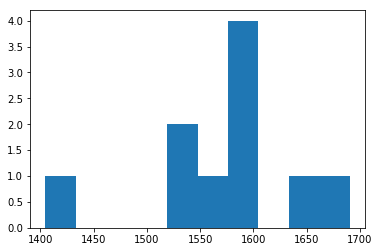

In [29]:
plt.hist(df_new.columns[np.argsort(rf.feature_importances_)[::-1][:10]], bins = 10)

In [30]:
data1 = go.Scatter(x = df_new.columns, y = xdata_chicken_mean, line = dict(color = 'green'), name = 'Fresh Chicken')
data2 = go.Scatter(x = df_new.columns, y = xdata_pork_mean, line = dict(color = 'red'), name = 'Fresh Pork')
data3 = go.Scatter(x = df_new.columns, y = xdata_turkey_mean, line = dict(color = 'blue'), name = 'Fresh Turkey')
layout = go.Layout(title = 'Comparison of Meat samples between Chicken, Pork and Turkey',
                  xaxis = dict(title = 'WaveNumbers(cm-1)'),
                  yaxis = dict(title = 'Absorption'))
fig = dict(data = [data1, data2, data3], layout = layout)
py.iplot(fig)